# **Fake News Prediction Model**

### *Import necessary libraries*

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### *Load the dataset from the specified path*

In [2]:
news_df = pd.read_csv('train.csv')

In [3]:
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# About the Dataset:

id: unique id for a news article                                     
title: the title of a news article                                  
author: author of the news article                                    
text: the text of the article; could be incomplete                                        
label: a label that marks whether the news article is real or fake:                              
    1: Fake news                                                 
    0: real News                                        

# 1 Preprocessing 

In [4]:
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
news_df.shape

(20800, 5)

In [6]:
news_df = news_df.fillna(' ')

In [7]:
news_df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
news_df['content'] = news_df['author']+' '+news_df['title']

In [9]:
news_df

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


# separating the data & label

In [10]:
X = news_df.drop('label',axis=1)
y = news_df['label']

In [11]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

# Stemming:

Stemming is the process of reducing a word to its Root word

example: hung         hanged        hanging ======hang

# Steps:
lower case                 
splitting                             
removing stopwords                              
stemming                                   

In [12]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
news_df['content'] = news_df['content'].apply(stemming)

In [14]:
news_df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

# separating the data and label


In [15]:
X = news_df['content'].values
y = news_df['label'].values

# converting the textual data to numerical data

In [16]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [17]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

# Splitting the dataset to training & test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [19]:
X_train.shape

(16640, 17128)

# Training the Model: Logistic Regression

In [20]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
cm = confusion_matrix(Y_test, y_pred)

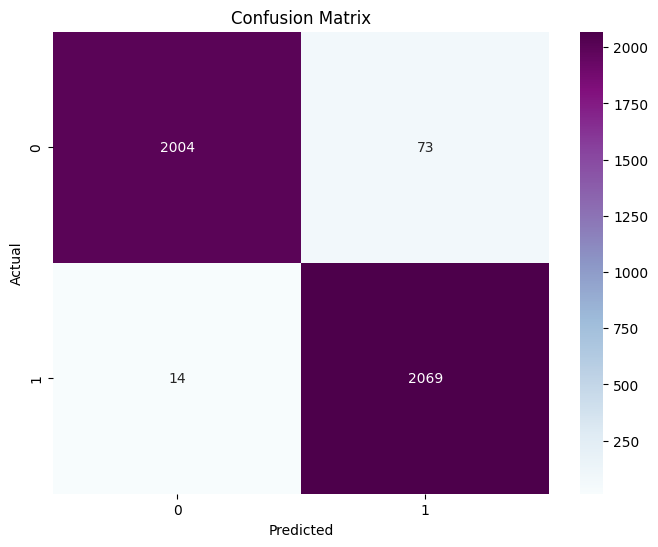

In [23]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=model.classes_, yticklabels=model.classes_)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [24]:
# on training set
train_y_pred = model.predict(X_train)
print(accuracy_score(train_y_pred,Y_train))

0.9863581730769231


In [25]:
# on testing set
testing_y_pred = model.predict(X_test)
print(accuracy_score(testing_y_pred,Y_test))

0.9790865384615385


# Detection System

In [26]:
input_data = X_test[10]
prediction = model.predict(input_data)

In [27]:
if prediction[0] == 0:
    print('The News Is Real')
else:
    print('The News is Fake')

The News Is Real


In [29]:
news_df['content'][21]

'jerom hudson monica lewinski clinton sex scandal set american crime stori'